<a href="https://colab.research.google.com/github/filchyboy/Examining-US-Forest-Service-Data---RDS-2019-0005/blob/master/Examining_US_Forest_Service_Data_RDS_2019_0005_Chris_Filkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing US Forest Service Field Studies
![Black Mountain Fire](https://raw.githubusercontent.com/filchyboy/Examining-US-Forest-Service-Data---RDS-2019-0005/master/130611-F-CL000-001.jpeg)

Normalized Burn Ratio is an index system to measure burn severity after a wildfire. It describes how fire intensity affects the functioning of the ecosystem in the area that has been burnt. Satellite images are taken of landscapes just prior to wildfires and then taken again after on a yearly basis. The difference in light reflection between both near infrared (NIR) and shortwave infrared (SWIR) wavelengths reflect the state of the pre & post burn ecosystem. Healthy vegetation shows a high reflectance in NIR, and low reflectance in SWIR portions of the spectrum - the opposite of what is seen in areas devastated by fire.

##Workbook Constraints & Tools

Importing libraries and modules to be used in parsing this notebook.

In [1]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.6.2)
Requirement already up-to-date: pyshp in /usr/local/lib/python3.6/dist-packages (2.1.0)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.6.4.post2)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

###Setting Constraints & Variables


In [0]:
pd.set_option('display.max_rows', 20)

# US Forest Service Data

[US Forest Service Data - RDS-2019-0005](https://www.fs.usda.gov/rds/archive/catalog/RDS-2019-0005-2) 

This data publication contains field and satellite observations at 1567 plots across wildfire extents that burned between the years 2000-2007, collected for Joint Fire Science Project ID: 14-1-02-27. 



In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/filchyboy/Examining-US-Forest-Service-Data---RDS-2019-0005/master/field_attrib_and_satellite_data.csv')

##Ancillary Data
Fires & Acres burned per year derived from NOAA Annual Wildfires Report

In [0]:
df2 = pd.read_csv('https://raw.githubusercontent.com/filchyboy/Examining-US-Forest-Service-Data---RDS-2019-0005/master/Yearly_WildFire_Totals_from_NOAA-Fires_Acre_Year.csv')

#Examining the US Forest Service Data

General examination to determine what steps would be useful to clean and organize the data as presented from the Joint Fire Science Project.

In [6]:
df.head()

,STATE,FIRE,PLOT,SITE,PLOT_LETTER,LONGITUDE,LATITUDE,X_ALBERS,Y_ALBERS,ELEVATION,VERT_PREC,HORZ_PREC,TRASP,SLOPE,BURN_YEAR,FIELD_DATE,UNDER_RICHNESS,UNDER_GRN_PERC,UNDER_NPV_PERC,UNDER_NPV_CHAR_PERC,ASH_PERC,ROCK_PERC,ROCK_CHAR_PERC,SOIL_PERC,SOIL_CHAR_PERC,TALL_SHRUB_PERC,CANOPY_AVE,FUEL_1HR,FUEL_10HR,FUEL_100HR,FUEL_1000HR,LITTER_DEPTH,DUFF_DEPTH,ABGR_LIVE_BA,ABGR_DEAD_BA,ABLA_LIVE_BA,ABLA_DEAD_BA,BEPA_LIVE_BA,BEPA_DEAD_BA,LAOC_LIVE_BA,...,OTHER_SAP_LIVE,OTHER_SAP_DEAD,TOTAL_SEED_LIVE,TOTAL_SEED_DEAD,TOTAL_SAP_LIVE,TOTAL_SAP_DEAD,DNBR,NBR_1984,NBR_1985,NBR_1986,NBR_1987,NBR_1988,NBR_1989,NBR_1990,NBR_1991,NBR_1992,NBR_1993,NBR_1994,NBR_1995,NBR_1996,NBR_1997,NBR_1998,NBR_1999,NBR_2000,NBR_2001,NBR_2002,NBR_2003,NBR_2004,NBR_2005,NBR_2006,NBR_2007,NBR_2008,NBR_2009,NBR_2010,NBR_2011,NBR_2012,NBR_2013,NBR_2014,NBR_2015,NBR_2016
0,MT,BLACK,BLACK_1_A,1,A,-114.224120,46.834971,-1387421.676,2782863.094,1635.524,NaN,NaN,0.001380,27.967438,2003,8/11/2013,9.0,57.0,25.0,1.0,0.0,10.0,0.0,8.0,0.0,0.0,58.854167,0.00,0.00,0.0,1.3,11.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5833.333333,0.0,0.0,0.0,871,659.0,659.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,658.0,657.0,657.0,657.0,657.0,657.0,657.0,657.0,657.0,656.0,-225.0,-165.0,-105.0,-44.0,15.0,76.0,136.0,197.0,257.0,317.0,378.0,438.0,499.0
1,MT,BLACK,BLACK_1_B,1,B,-114.223997,46.834690,-1387418.342,2782830.681,1650.342,NaN,NaN,0.000572,28.338678,2003,8/11/2013,9.0,54.0,40.0,10.0,0.0,6.0,0.0,0.0,0.0,NaN,45.312500,0.08,0.06,0.7,NaN,14.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,857,638.0,642.0,645.0,649.0,652.0,656.0,660.0,663.0,667.0,671.0,674.0,678.0,681.0,685.0,689.0,692.0,696.0,700.0,703.0,707.0,-275.0,-205.0,-134.0,-63.0,6.0,77.0,148.0,218.0,289.0,360.0,431.0,501.0,572.0
2,MT,BLACK,BLACK_1_D,1,D,-114.224508,46.834817,-1387454.074,2782851.967,1631.256,NaN,NaN,0.021165,27.937103,2003,8/11/2013,15.0,57.0,40.0,25.0,0.0,2.0,0.0,1.0,0.0,NaN,50.000000,0.01,0.00,0.2,NaN,14.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,877,670.0,671.0,672.0,673.0,674.0,675.0,676.0,677.0,678.0,679.0,680.0,681.0,681.0,682.0,683.0,684.0,685.0,686.0,687.0,688.0,-238.0,-167.0,-95.0,-24.0,47.0,119.0,190.0,262.0,334.0,405.0,477.0,548.0,620.0
3,MT,BLACK,BLACK_1_F,1,F,-114.224263,46.835208,-1387427.416,2782890.906,1617.569,NaN,NaN,0.045259,27.995329,2003,8/11/2013,8.0,67.0,30.0,30.0,0.0,1.0,0.0,2.0,0.0,NaN,20.312500,0.05,0.10,0.2,NaN,18.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,756,680.0,679.0,678.0,678.0,677.0,677.0,676.0,676.0,675.0,675.0,674.0,674.0,673.0,673.0,672.0,671.0,671.0,670.0,670.0,669.0,-217.0,-157.0,-97.0,-37.0,21.0,81.0,141.0,200.0,260.0,320.0,379.0,439.0,499.0
4,MT,BLACK,BLACK_1_H,1,H,-114.223744,46.835045,-1387391.814,2782865.610,1624.488,NaN,NaN,0.118100,23.778915,2003,8/11/2013,9.0,55.0,35.0,15.0,0.0,2.0,0.0,8.0,0.0,NaN,64.583333,0.05,0.03,0.3,NaN,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1058,663.0,662.0,662.0,662.0,661.0,661.0,661.0,660.0,660.0,660.0,660.0,659.0,659.0,659.0,658.0,658.0,658.0,657.0,657.0,657.0,-311.0,-236.0,-161.0,-87.0,-12.0,61.0,136.0,211.0,285.0,360.0,435.0,509.0,584.0


In [7]:
df.tail()

,STATE,FIRE,PLOT,SITE,PLOT_LETTER,LONGITUDE,LATITUDE,X_ALBERS,Y_ALBERS,ELEVATION,VERT_PREC,HORZ_PREC,TRASP,SLOPE,BURN_YEAR,FIELD_DATE,UNDER_RICHNESS,UNDER_GRN_PERC,UNDER_NPV_PERC,UNDER_NPV_CHAR_PERC,ASH_PERC,ROCK_PERC,ROCK_CHAR_PERC,SOIL_PERC,SOIL_CHAR_PERC,TALL_SHRUB_PERC,CANOPY_AVE,FUEL_1HR,FUEL_10HR,FUEL_100HR,FUEL_1000HR,LITTER_DEPTH,DUFF_DEPTH,ABGR_LIVE_BA,ABGR_DEAD_BA,ABLA_LIVE_BA,ABLA_DEAD_BA,BEPA_LIVE_BA,BEPA_DEAD_BA,LAOC_LIVE_BA,...,OTHER_SAP_LIVE,OTHER_SAP_DEAD,TOTAL_SEED_LIVE,TOTAL_SEED_DEAD,TOTAL_SAP_LIVE,TOTAL_SAP_DEAD,DNBR,NBR_1984,NBR_1985,NBR_1986,NBR_1987,NBR_1988,NBR_1989,NBR_1990,NBR_1991,NBR_1992,NBR_1993,NBR_1994,NBR_1995,NBR_1996,NBR_1997,NBR_1998,NBR_1999,NBR_2000,NBR_2001,NBR_2002,NBR_2003,NBR_2004,NBR_2005,NBR_2006,NBR_2007,NBR_2008,NBR_2009,NBR_2010,NBR_2011,NBR_2012,NBR_2013,NBR_2014,NBR_2015,NBR_2016
1562,MT,WEDGE,WEDGE_U101_A,U101,A,-114.391311,48.874973,-1356707.722,3006175.769,1205.384374,1.6,1.2,0.991466,4.393377,2003,7/16/2015,8.0,80.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.125000,0.07,0.03,0.00,0.1,13.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5200.0,400.0,1900.0,0.0,67,370.0,377.0,384.0,390.0,397.0,403.0,410.0,416.0,423.0,430.0,436.0,443.0,449.0,456.0,462.0,469.0,476.0,482.0,489.0,495.0,502.0,509.0,515.0,522.0,528.0,535.0,541.0,548.0,555.0,561.0,568.0,574.0,581.0
1563,MT,WEDGE,WEDGE_U101_B,U101,B,-114.391250,48.875237,-1356697.737,3006203.345,1210.325289,1.2,1.0,0.933013,2.385944,2003,7/16/2015,10.0,75.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,78.385417,0.01,0.00,0.70,NaN,8.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,900.0,0.0,300.0,400.0,-47,370.0,377.0,384.0,391.0,398.0,405.0,412.0,419.0,427.0,434.0,441.0,448.0,455.0,462.0,469.0,476.0,484.0,491.0,498.0,505.0,512.0,519.0,526.0,533.0,540.0,548.0,555.0,562.0,569.0,576.0,583.0,590.0,597.0
1564,MT,WEDGE,WEDGE_U101_D,U101,D,-114.390908,48.874929,-1356679.280,3006165.290,1207.729232,1.4,1.0,0.973633,3.646971,2003,7/16/2015,11.0,85.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,87.760417,0.02,0.02,0.02,NaN,16.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,300.0,0.0,600.0,100.0,28,339.0,356.0,373.0,390.0,407.0,425.0,442.0,459.0,476.0,481.0,485.0,490.0,495.0,500.0,505.0,510.0,514.0,519.0,524.0,529.0,534.0,539.0,543.0,548.0,553.0,558.0,563.0,568.0,572.0,577.0,582.0,587.0,592.0
1565,MT,WEDGE,WEDGE_U101_F,U101,F,-114.391368,48.874719,-1356717.264,3006149.172,1205.175847,1.1,1.0,0.943389,3.109633,2003,7/16/2015,6.0,70.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,74.479167,0.05,0.05,1.00,NaN,10.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1800.0,0.0,0.0,0.0,42,304.0,321.0,337.0,353.0,369.0,386.0,402.0,418.0,434.0,451.0,467.0,483.0,478.0,473.0,467.0,462.0,456.0,451.0,458.0,465.0,472.0,478.0,485.0,492.0,499.0,506.0,513.0,520.0,526.0,533.0,540.0,547.0,554.0
1566,MT,WEDGE,WEDGE_U101_H,U101,H,-114.391729,48.875021,-1356737.147,3006186.913,1206.872080,1.2,0.9,0.993895,3.321432,2003,7/16/2015,13.0,90.0,6.0,0.0,0.0,3.0,0.0,1.0,0.0,NaN,77.343750,0.01,0.02,0.00,NaN,10.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2400.0,0.0,1200.0,100.0,18,308.0,326.0,344.0,363.0,381.0,399.0,417.0,436.0,454.0,472.0,475.0,478.0,481.0,484.0,487.0,490.0,493.0,497.0,500.0,503.0,506.0,509.0,512.0,515.0,518.0,521.0,524.0,527.0,530.0,533.0,536.0,539.0,543.0


In [8]:
df.shape

(1567, 163)

In [9]:
df.dtypes

STATE           object
FIRE            object
PLOT            object
SITE            object
PLOT_LETTER     object
                ...   
NBR_2012       float64
NBR_2013       float64
NBR_2014       float64
NBR_2015       float64
NBR_2016       float64
Length: 163, dtype: object

In [10]:
df.info

<bound method DataFrame.info of      STATE   FIRE          PLOT  SITE  ... NBR_2013  NBR_2014  NBR_2015  NBR_2016
0       MT  BLACK     BLACK_1_A     1  ...    317.0     378.0     438.0     499.0
1       MT  BLACK     BLACK_1_B     1  ...    360.0     431.0     501.0     572.0
2       MT  BLACK     BLACK_1_D     1  ...    405.0     477.0     548.0     620.0
3       MT  BLACK     BLACK_1_F     1  ...    320.0     379.0     439.0     499.0
4       MT  BLACK     BLACK_1_H     1  ...    360.0     435.0     509.0     584.0
...    ...    ...           ...   ...  ...      ...       ...       ...       ...
1562    MT  WEDGE  WEDGE_U101_A  U101  ...    561.0     568.0     574.0     581.0
1563    MT  WEDGE  WEDGE_U101_B  U101  ...    576.0     583.0     590.0     597.0
1564    MT  WEDGE  WEDGE_U101_D  U101  ...    577.0     582.0     587.0     592.0
1565    MT  WEDGE  WEDGE_U101_F  U101  ...    533.0     540.0     547.0     554.0
1566    MT  WEDGE  WEDGE_U101_H  U101  ...    533.0     536.0     

In [11]:
df.describe

<bound method NDFrame.describe of      STATE   FIRE          PLOT  SITE  ... NBR_2013  NBR_2014  NBR_2015  NBR_2016
0       MT  BLACK     BLACK_1_A     1  ...    317.0     378.0     438.0     499.0
1       MT  BLACK     BLACK_1_B     1  ...    360.0     431.0     501.0     572.0
2       MT  BLACK     BLACK_1_D     1  ...    405.0     477.0     548.0     620.0
3       MT  BLACK     BLACK_1_F     1  ...    320.0     379.0     439.0     499.0
4       MT  BLACK     BLACK_1_H     1  ...    360.0     435.0     509.0     584.0
...    ...    ...           ...   ...  ...      ...       ...       ...       ...
1562    MT  WEDGE  WEDGE_U101_A  U101  ...    561.0     568.0     574.0     581.0
1563    MT  WEDGE  WEDGE_U101_B  U101  ...    576.0     583.0     590.0     597.0
1564    MT  WEDGE  WEDGE_U101_D  U101  ...    577.0     582.0     587.0     592.0
1565    MT  WEDGE  WEDGE_U101_F  U101  ...    533.0     540.0     547.0     554.0
1566    MT  WEDGE  WEDGE_U101_H  U101  ...    533.0     536.0   

In [12]:
#Retrieving accurate list of columns for use in exploration
for col in df.columns: 
    print(col) 

STATE
FIRE
PLOT
SITE
PLOT_LETTER
LONGITUDE
LATITUDE
X_ALBERS
Y_ALBERS
ELEVATION
VERT_PREC
HORZ_PREC
TRASP
SLOPE
BURN_YEAR
FIELD_DATE
UNDER_RICHNESS
UNDER_GRN_PERC
UNDER_NPV_PERC
UNDER_NPV_CHAR_PERC
ASH_PERC
ROCK_PERC
ROCK_CHAR_PERC
SOIL_PERC
SOIL_CHAR_PERC
TALL_SHRUB_PERC
CANOPY_AVE
FUEL_1HR
FUEL_10HR
FUEL_100HR
FUEL_1000HR
LITTER_DEPTH
DUFF_DEPTH
ABGR_LIVE_BA
ABGR_DEAD_BA
ABLA_LIVE_BA
ABLA_DEAD_BA
BEPA_LIVE_BA
BEPA_DEAD_BA
LAOC_LIVE_BA
LAOC_DEAD_BA
PICO_LIVE_BA
PICO_DEAD_BA
PIEN_LIVE_BA
PIEN_DEAD_BA
PIGL_LIVE_BA
PIGL_DEAD_BA
PIMA_LIVE_BA
PIMA_DEAD_BA
PIPO_LIVE_BA
PIPO_DEAD_BA
POTR_LIVE_BA
POTR_DEAD_BA
PSME_LIVE_BA
PSME_DEAD_BA
QUKE_LIVE_BA
QUKE_DEAD_BA
QULO_LIVE_BA
QULO_DEAD_BA
THPL_LIVE_BA
THPL_DEAD_BA
OTHER_LIVE_BA
OTHER_DEAD_BA
TOTAL_LIVE_BA
TOTAL_DEAD_BA
ABGR_SEED_LIVE
ABGR_SEED_DEAD
ABGR_SAP_LIVE
ABGR_SAP_DEAD
ABLA_SEED_LIVE
ABLA_SEED_DEAD
ABLA_SAP_LIVE
ABLA_SAP_DEAD
BEPA_SEED_LIVE
BEPA_SEED_DEAD
BEPA_SAP_LIVE
BEPA_SAP_DEAD
LAOC_SEED_LIVE
LAOC_SEED_DEAD
LAOC_SAP_LIVE
LAOC_SAP_DEA

###Nulls

There are a number of nulls in the data set. The can be found in multiple facets & rows of the observations. Further examination will be needed.

In [13]:
df.isnull().sum()

STATE            0
FIRE             0
PLOT             0
SITE            25
PLOT_LETTER      0
              ... 
NBR_2012       161
NBR_2013       161
NBR_2014       161
NBR_2015       161
NBR_2016       161
Length: 163, dtype: int64

##Cleaning the ancillary data


In [14]:
df2.head()

,Year,Fires,Acres
0,1985,82591,2896147
1,1986,85907,2719162
2,1987,71300,2447296
3,1988,72750,5009290
4,1989,48949,1827310


In [15]:
df2.tail()

,Year,Fires,Acres
29,2014,63345,3587561
30,2015,61922,10125149
31,2016,65575,5446520
32,2017,66131,9781062
33,2018,55911,8582609


In [16]:
df2.shape

(34, 3)

In [17]:
df2.describe

<bound method NDFrame.describe of     Year  Fires     Acres
0   1985  82591   2896147
1   1986  85907   2719162
2   1987  71300   2447296
3   1988  72750   5009290
4   1989  48949   1827310
..   ...    ...       ...
29  2014  63345   3587561
30  2015  61922  10125149
31  2016  65575   5446520
32  2017  66131   9781062
33  2018  55911   8582609

[34 rows x 3 columns]>

In [18]:
df2.info

<bound method DataFrame.info of     Year  Fires     Acres
0   1985  82591   2896147
1   1986  85907   2719162
2   1987  71300   2447296
3   1988  72750   5009290
4   1989  48949   1827310
..   ...    ...       ...
29  2014  63345   3587561
30  2015  61922  10125149
31  2016  65575   5446520
32  2017  66131   9781062
33  2018  55911   8582609

[34 rows x 3 columns]>

In [19]:
df2.dtypes

Year     int64
Fires    int64
Acres    int64
dtype: object

#Attaching Timestamp

The Pandas Time tools to the 'FIELD_DATE' column before I look for missing data. I expect that the date & time these observations were made will be useful in anazlyzing the data.

In [0]:
df['FIELD_DATE'] = pd.to_datetime(df['FIELD_DATE'], infer_datetime_format=True)

#Cleaning the Data for Evaluation

This data set comes with a number of issues. It contains date/time formats & null cells. More explorations to determine if any data can be dropped may be needed.

##Exploring Missing Data

First I'm examining the frequency and types of missing data in the set.


###Null Tally


In [21]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

SITE               25
VERT_PREC         186
HORZ_PREC         186
FIELD_DATE          5
UNDER_RICHNESS     30
                 ... 
NBR_2012          161
NBR_2013          161
NBR_2014          161
NBR_2015          161
NBR_2016          161
Length: 150, dtype: int64

###Looking at Vertical & Horizontal Precision in GPS output. 

It appears that the missing data in these rows is mirrored in each column. This shows me that the data contains ommissions in reporting, not in the data itself. My theory would be that if the data is missing due to some technical issue with the data there would not be a match between horizontal and vertical precision fields. There is a precise match. This means, I think that GPS observations were simply not taken or observations were taken without GPS. Interesting question here: Does the data give me a way to show whether these were GPS observations taken without Vertical & Horizontal Precision data or were these observations made without GPS? I don't know if GPS allows measurements without these facets. I suspect not. I suspect this data is simply missing.

But I'm going to remove these columns as I don't think the accuracy of these GPS measurements is relevant for my purposes.

In [0]:
df_nullset_vert_prec = df[df["VERT_PREC"].isnull()][null_columns]
vert_prec_list = np.array(df_nullset_vert_prec.index.values)

df_nullset_horz_prec = df[df["HORZ_PREC"].isnull()][null_columns]
horz_prec_list = np.array(df_nullset_horz_prec.index.values)

In [23]:
np.array_equal([vert_prec_list], [horz_prec_list])

True

##SITE Column Resolve

It seems incongruous that this data set is missing 25 'SITE' cells as the entire data set revolves around where these measurements have been taken. Further exploration of these missing 'SITE' cells is warranted.

In [24]:
df_nullset_site = df[df['SITE'].isnull()][null_columns]
print(df_nullset_site['SITE'].head())

1247    NaN
1248    NaN
1249    NaN
1250    NaN
1251    NaN
Name: SITE, dtype: object


In [0]:
null_set_list = np.array(df_nullset_site.index.values)

In [26]:
print(null_set_list)

[1247 1248 1249 1250 1251 1272 1273 1274 1275 1276 1307 1308 1309 1310
 1311 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336]


###SITE versus PLOT

SITE seems to be a location where observations were taken in which multiple plots are measured for their NBR.

I take a snapshot here of the SITE nullset to ensure there is enough information to successfully maintain context for the data. It is clear the nulls for SITE can be removed without an issue.

In [27]:
for each in (null_set_list):
  print(df.at[each, 'LATITUDE'],df.at[each, 'LONGITUDE'],df.at[each,'BURN_YEAR'], df.at[each,'FIRE'], df.at[each,'PLOT'])

46.23850024 -117.6404189 2005 SCHOOL SCHOOL_CONTROL_1_A
46.23845137 -117.64004560000001 2005 SCHOOL SCHOOL_CONTROL_1_B
46.23822581 -117.6405225 2005 SCHOOL SCHOOL_CONTROL_1_D
46.23855725 -117.64081359999999 2005 SCHOOL SCHOOL_CONTROL_1_F
46.23875679 -117.64033130000001 2005 SCHOOL SCHOOL_CONTROL_1_H
46.22187925 -117.6762726 2005 SCHOOL SCHOOL_HYDROMULCH_1_A
46.22182784 -117.6766672 2005 SCHOOL SCHOOL_HYDROMULCH_1_B
46.22213718 -117.6763781 2005 SCHOOL SCHOOL_HYDROMULCH_1_D
46.22194059 -117.6759121 2005 SCHOOL SCHOOL_HYDROMULCH_1_F
46.22163877 -117.67611670000001 2005 SCHOOL SCHOOL_HYDROMULCH_1_H
46.22028413 -117.65598179999999 2005 SCHOOL SCHOOL_SEEDED_1_A
46.22003724 -117.6558466 2005 SCHOOL SCHOOL_SEEDED_1_B
46.22014674 -117.6563362 2005 SCHOOL SCHOOL_SEEDED_1_D
46.22052825 -117.65613 2005 SCHOOL SCHOOL_SEEDED_1_F
46.22046529 -117.65563629999998 2005 SCHOOL SCHOOL_SEEDED_1_H
46.22239505 -117.66523529999999 2005 SCHOOL SCHOOL_WHEAT_STRAW_1_A
46.22214437 -117.66508400000001 2005 SCHOOL

##Interpolation

I have compiled a list of columns which contain floating point or integers which can be used to derive the missing values from cells. Given a dataframe shape of [1567 rows x 163 columns] I determined that I would not interpolate any missing cell where less than 1/3 of the total column is missing.

Interpolation here is done across all of the data. In order to conserve time I have chosen to handle this interpolation across all of the data. If I have time I will come back and interpolate these columns by 'FIRE' as that should give a more accurate output in the finished graphs.


In [0]:
interpol_list = ['NBR_1984','NBR_1985','NBR_1986','NBR_1987','NBR_1988','NBR_1989',
            'NBR_1990','NBR_1991','NBR_1992','NBR_1993','NBR_1994','NBR_1995',
            'NBR_1996','NBR_1997','NBR_1998','NBR_1999','NBR_2000','NBR_2001',
            'NBR_2002','NBR_2003','NBR_2004','NBR_2005','NBR_2006','NBR_2007',
            'NBR_2008','NBR_2009','NBR_2010','NBR_2011','NBR_2012','NBR_2013',
            'NBR_2014','NBR_2015','NBR_2016','UNDER_RICHNESS','UNDER_GRN_PERC',
            'OTHER_SAP_DEAD','TOTAL_SEED_LIVE','TOTAL_SEED_DEAD','HORZ_PREC',
            'VERT_PREC','TOTAL_SAP_LIVE','TOTAL_SAP_DEAD','SALIX_SAP_LIVE',
            'SALIX_SAP_DEAD','OTHER_SEED_LIVE','OTHER_SEED_DEAD','OTHER_SAP_LIVE',
            'PICEA_SEED_DEAD','PICEA_SAP_LIVE','PICEA_SAP_DEAD','SALIX_SEED_LIVE',
            'SALIX_SEED_DEAD','UNDER_NPV_PERC','UNDER_NPV_CHAR_PERC','ASH_PERC',
            'ROCK_PERC','QUERCUS_SEED_LIVE','QUERCUS_SEED_DEAD','QUERCUS_SAP_LIVE',
            'QUERCUS_SAP_DEAD','PICEA_SEED_LIVE','POTR_SAP_DEAD','PSME_SEED_LIVE',
            'PSME_SEED_DEAD','PSME_SAP_LIVE','PSME_SAP_DEAD','ROCK_CHAR_PERC',
            'SOIL_PERC','PIPO_SAP_LIVE','PIPO_SAP_DEAD','POTR_SEED_LIVE',
            'POTR_SEED_DEAD','POTR_SAP_LIVE','SOIL_CHAR_PERC','PIMA_SEED_DEAD',
            'PIMA_SAP_LIVE','PIMA_SAP_DEAD','PIPO_SEED_LIVE','PIPO_SEED_DEAD',
            'PIGL_SEED_LIVE','PIGL_SEED_DEAD','PIGL_SAP_LIVE','PIGL_SAP_DEAD',
            'PIMA_SEED_LIVE','PICO_SAP_DEAD','PIEN_SEED_LIVE','PIEN_SEED_DEAD',
            'PIEN_SAP_LIVE','PIEN_SAP_DEAD','LAOC_SAP_LIVE','LAOC_SAP_DEAD',
            'PICO_SEED_LIVE','PICO_SEED_DEAD','PICO_SAP_LIVE','BEPA_SEED_DEAD',
            'BEPA_SAP_LIVE','BEPA_SAP_DEAD','LAOC_SEED_LIVE','LAOC_SEED_DEAD',
            'ABLA_SEED_LIVE','ABLA_SEED_DEAD','ABLA_SAP_LIVE','ABLA_SAP_DEAD',
            'BEPA_SEED_LIVE','TOTAL_DEAD_BA','ABGR_SEED_LIVE','ABGR_SEED_DEAD',
            'ABGR_SAP_LIVE','ABGR_SAP_DEAD','THPL_LIVE_BA','THPL_DEAD_BA',
            'OTHER_LIVE_BA','OTHER_DEAD_BA','TOTAL_LIVE_BA','PSME_DEAD_BA',
            'QUKE_LIVE_BA','QUKE_DEAD_BA','QULO_LIVE_BA','QULO_DEAD_BA',
            'PIPO_LIVE_BA','PIPO_DEAD_BA','POTR_LIVE_BA','POTR_DEAD_BA',
            'PSME_LIVE_BA','PIEN_DEAD_BA','PIGL_LIVE_BA','PIGL_DEAD_BA',
            'PIMA_LIVE_BA','PIMA_DEAD_BA','LAOC_LIVE_BA','LAOC_DEAD_BA',
            'PICO_LIVE_BA','PICO_DEAD_BA','PIEN_LIVE_BA','ABGR_DEAD_BA',
            'ABLA_LIVE_BA','ABLA_DEAD_BA','BEPA_LIVE_BA','BEPA_DEAD_BA',
            'FUEL_100HR','LITTER_DEPTH','DUFF_DEPTH','ABGR_LIVE_BA',
            'CANOPY_AVE','FUEL_1HR','FUEL_10HR']

for each in (interpol_list):
    df[each] = df[each].interpolate()

Note that with the new interpolations done the list of nulls has changed substantially. Clearly the NBR numbers constituted the vast majority of the missing data.

In [29]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

SITE                 25
VERT_PREC            30
HORZ_PREC            30
FIELD_DATE            5
TALL_SHRUB_PERC    1327
FUEL_1000HR        1325
dtype: int64

##Field Date Exploration

In exploring the data around the missing 5 FIELD_DATE data cells I learned that the rows around these cells came in batches of 10 rows of observations. The rows with a FIELD_DATE of 2015-07-16 numbered 5 so in order to maintian consistancy I'm changing the missing NaT values for index 1522-1526 to be the date of 2015-07-16.

In [30]:
df_nullset_field_date = df[df["FIELD_DATE"].isnull()][null_columns]
field_date_list = np.array(df_nullset_field_date.index.values)
print(df_nullset_field_date)

     SITE  VERT_PREC  HORZ_PREC FIELD_DATE  TALL_SHRUB_PERC  FUEL_1000HR
1522    1        1.6   1.004878        NaT              NaN          NaN
1523    1        1.6   1.009756        NaT              NaN          NaN
1524    1        1.6   1.014634        NaT              NaN          NaN
1525    1        1.6   1.019512        NaT              NaN          NaN
1526    1        1.6   1.024390        NaT              NaN          NaN


###Previous dates

In [31]:
field_search_list = [1517,1518,1519,1520,1521]
for each in (field_search_list):
  print(df.at[each, 'FIELD_DATE'])

2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00


###Change the missing NaT to those dates.

In [32]:
field_search_list = [1522,1523,1524,1525,1526]
for each in (field_search_list):
  df.at[each, 'FIELD_DATE'] = '2015-07-16'
  print(df.at[each, 'FIELD_DATE'])

2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00
2015-07-16 00:00:00


##Final Drop of Missing Data from Set

Criteria for dropping data is either that the missing values constitute more than 2/3 of the possible values, I've determined I can't interpolate the missing values, or that the column is not part of what I will analyze in the data set.

In [0]:
df.drop(['SITE','TALL_SHRUB_PERC','FUEL_1000HR','VERT_PREC','HORZ_PREC'],axis=1,inplace=True)

In [34]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

#Analyze Cleaned Data

##Fires & Fire Complexes

Previously burned areas included the extents of the 2000 Jasper wildfire in western South Dakota; 2002 Hayman wildfire in central Colorado; 2003 Black Mountain, Cooney Ridge, Robert, and Wedge Canyon wildfires in western Montana; 2003 Old and Simi wildfires in southern California; 2003 Myrtle Creek wildfire in northern Idaho; 2004 Porcupine, Chicken, and Wall Street wildfires in interior Alaska; 2005 School wildfire in eastern Washington; 2005 Ricco wildfire in South Dakota; 2006 Shake Table or Thorn Creek wildfire in central Oregon; 2006 Tripod wildfire complex in north-central Washington; 2007 Egley wildfire in central Oregon; and the 2007 East Zone/Cascade wildfire complex in central Idaho.

###Setting Dictionaries

In [35]:
#Getting an accurate list of the fires in the data set.
df_fire_list = df["FIRE"].value_counts()
print(df_fire_list)

EGLEY       380
HAYMAN      175
CASCADE     125
PORC        121
SCHOOL      105
JASPER       80
TRIPOD       80
EASTZONE     75
COONEY       71
WEDGE        60
ROBERT       55
SIMI         40
MYRTLE       40
SHAKE        30
OLD          30
RICCO        30
BLACK        30
WALL         20
CHIC         20
Name: FIRE, dtype: int64


In [36]:
#Getting an accurate list of the states in the data set.
df_state_list = df["STATE"].value_counts()
print(df_state_list)

OR    410
ID    240
MT    216
WA    185
CO    175
AK    161
SD    110
CA     70
Name: STATE, dtype: int64


In [0]:
#Creating a proper list of fires to use when slicing the original data frame.
fires = ['EGLEY', 'HAYMAN', 'CASCADE', 'PORC', 'JASPER', 'TRIPOD', 'EASTZONE',
         'COONEY', 'WEDGE', 'ROBERT', 'SIMI', 'MYRTLE', 'SHAKE', 'OLD', 'RICCO',
         'BLACK', 'CHIC', 'WALL']
#Creating a list of NBR fields for DRYing my code.        
burn_ratios = ['NBR_1984', 'NBR_1985', 'NBR_1986', 'NBR_1987', 'NBR_1988', 
               'NBR_1989', 'NBR_1990', 'NBR_1991', 'NBR_1992', 'NBR_1993', 
               'NBR_1994', 'NBR_1995', 'NBR_1996', 'NBR_1997', 'NBR_1998', 
               'NBR_1999', 'NBR_2000', 'NBR_2001', 'NBR_2002', 'NBR_2003', 
               'NBR_2004', 'NBR_2005', 'NBR_2006', 'NBR_2007', 'NBR_2008', 
               'NBR_2009', 'NBR_2010', 'NBR_2011', 'NBR_2012', 'NBR_2013',
               'NBR_2014', 'NBR_2015', 'NBR_2016']
#State dictionary creates nice versions of states rather than abbreviations
state_dict = {'ID':'Idaho', 'CO':'Colorado', 'OR':'Oregon', 'MT':'Montana',
              'WA':'Washington', 'AK':'Alaska', 'SD':'South Dakota', 
              'CA':'California'}
#Fire dictionary used for proper names of fires. Data set comes with shortened
#and abbreviated versions of names              
fire_dict = {'EGLEY':'Egley Complex Fire','HAYMAN':'Hayman Fire','CASCADE':
             'Cascade Complex Fire','PORC':'Porcupine Fire','JASPER':'Jasper Fire',
             'TRIPOD':'Tripod Complex Fire','EASTZONE':'Idaho East Zone Fire Complex',
             'COONEY':'Cooney Ridge Fire','WEDGE':'Wedge Canyon Fire',
             'ROBERT':'Robert Fire','SIMI':'Simi Fire','MYRTLE':'Myrtle Fire',
             'SHAKE':'Shake Table Fire','OLD':'Old Complex Fire',
             'RICCO':'Ricco Fire','BLACK':'Black Mountain Fire',
             'CHIC':'Chicken Fire','WALL':'Wall Street Fire'}
#Year dictionary used for title in graph             
year_dict = {'EGLEY':'2007','HAYMAN':'2002','CASCADE':'2007','PORC':'2004',
             'JASPER':'2000','TRIPOD':'2006','EASTZONE':'2007',
             'COONEY':'2003','WEDGE':'2003','ROBERT':'2003','SIMI':'2003',
             'MYRTLE':'2003','SHAKE':'2006','OLD':'2003','RICCO':'2005',
             'BLACK':'2003','CHIC':'2004','WALL':'2004'}
#Empty dictionaries to be used in next phase of evaluation
sub_fires = {}
sub_plot = {}
sub_nbr_mean = {}
fires_df = []


###Creating Sub DataFrames Per Fire

In [0]:
# I do not currently have time to refactor this code. Will do asap.
for value in fires:
  sub_fires[value] = df[df['FIRE'] == value]
  sub_plot[value] = [sub_fires[value]['NBR_1984'],sub_fires[value]['NBR_1985'],
                     sub_fires[value]['NBR_1986'],sub_fires[value]['NBR_1987'],
                     sub_fires[value]['NBR_1988'],sub_fires[value]['NBR_1989'],
                     sub_fires[value]['NBR_1990'],sub_fires[value]['NBR_1991'],
                     sub_fires[value]['NBR_1992'],sub_fires[value]['NBR_1993'],
                     sub_fires[value]['NBR_1994'],sub_fires[value]['NBR_1995'],
                     sub_fires[value]['NBR_1996'],sub_fires[value]['NBR_1997'],
                     sub_fires[value]['NBR_1998'],sub_fires[value]['NBR_1999'],
                     sub_fires[value]['NBR_2000'],sub_fires[value]['NBR_2001'],
                     sub_fires[value]['NBR_2002'],sub_fires[value]['NBR_2003'],
                     sub_fires[value]['NBR_2004'],sub_fires[value]['NBR_2005'],
                     sub_fires[value]['NBR_2006'],sub_fires[value]['NBR_2006'],
                     sub_fires[value]['NBR_2007'],sub_fires[value]['NBR_2008'],
                     sub_fires[value]['NBR_2009'],sub_fires[value]['NBR_2010'],
                     sub_fires[value]['NBR_2011'],sub_fires[value]['NBR_2012'],
                     sub_fires[value]['NBR_2013'],sub_fires[value]['NBR_2014'],
                     sub_fires[value]['NBR_2015'],sub_fires[value]['NBR_2016']]                      
  sub_nbr_mean[value] = [np.mean(np.array(sub_plot[value][0])),
                         np.mean(np.array(sub_plot[value][1])),
                         np.mean(np.array(sub_plot[value][2])),
                         np.mean(np.array(sub_plot[value][3])),
                         np.mean(np.array(sub_plot[value][4])),
                         np.mean(np.array(sub_plot[value][5])),
                         np.mean(np.array(sub_plot[value][6])),
                         np.mean(np.array(sub_plot[value][7])),
                         np.mean(np.array(sub_plot[value][8])),
                         np.mean(np.array(sub_plot[value][9])),
                         np.mean(np.array(sub_plot[value][10])),
                         np.mean(np.array(sub_plot[value][11])),
                         np.mean(np.array(sub_plot[value][12])),
                         np.mean(np.array(sub_plot[value][13])),
                         np.mean(np.array(sub_plot[value][14])),
                         np.mean(np.array(sub_plot[value][15])),
                         np.mean(np.array(sub_plot[value][16])),
                         np.mean(np.array(sub_plot[value][17])),
                         np.mean(np.array(sub_plot[value][18])),
                         np.mean(np.array(sub_plot[value][19])),
                         np.mean(np.array(sub_plot[value][20])),
                         np.mean(np.array(sub_plot[value][21])),
                         np.mean(np.array(sub_plot[value][22])),
                         np.mean(np.array(sub_plot[value][23])),
                         np.mean(np.array(sub_plot[value][24])),
                         np.mean(np.array(sub_plot[value][25])),
                         np.mean(np.array(sub_plot[value][26])),
                         np.mean(np.array(sub_plot[value][27])),
                         np.mean(np.array(sub_plot[value][28])),
                         np.mean(np.array(sub_plot[value][29])),
                         np.mean(np.array(sub_plot[value][30])),
                         np.mean(np.array(sub_plot[value][31])),
                         np.mean(np.array(sub_plot[value][32])),
                         np.mean(np.array(sub_plot[value][33]))
                         ]
us_fires = np.array(df2['Fires'])

us_fires_acres = np.array(df2['Acres'])
                   

###Define Graphing Functions

In [0]:
#Returns graph for NBR data based on individual fires
def graph_fire(FIRE):
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot()
    axes = fig.add_axes()
    title = fire_dict.get(FIRE) + " " + year_dict.get(FIRE)
    plt.plot(sub_nbr_mean[FIRE])
    plt.title(title)
    plt.xlabel('Year',fontsize=16)
    ax.set_xticklabels(['1984','','1988','','1992','','1996','','2000','',
                        '2004','','2008','','2012','','2016'], fontsize=10,ha='center')    
    ax.set_xticks(range(0,35,2))
    ax.set_yticks(range(-500,800,100))
    plt.ylabel('Normalized Burn Ratio',fontsize=16)
    plt.show()

In [0]:
def graph_us():
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot()
    axes = fig.add_axes()
    title = "US Wildfires 1984 - 2018"
    plt.plot(us_fires)
    plt.title(title)
    plt.xlabel('Year',fontsize=16)
    ax.set_xticklabels(['1984','','1988','','1992','','1996','','2000','',
                        '2004','','2008','','2012','','2016'], fontsize=10,ha='center')    
    ax.set_xticks(range(0,35,2))
    ax.set_yticks(range(0,100000,10000))
    plt.ylabel('US Wildfires',fontsize=16)
    plt.show()

In [0]:
def graph_acres():
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot()
    axes = fig.add_axes()
    title = "US Acres Burned in Wildfires 1984 - 2018"
    plt.plot(us_fires_acres)
    plt.title(title)
    plt.xlabel('Year',fontsize=16)
    ax.set_xticklabels(['1984','','1988','','1992','','1996','','2000','',
                        '2004','','2008','','2012','','2016'], fontsize=10,ha='center')    
    ax.set_xticks(range(0,35,2))
    ax.set_yticks(range(0,11000000,1000000))
    plt.ylabel('Acres Burned in US Wildfires by Millions',fontsize=16)
    plt.show()

#Working Copy of Graph Model

Replace name of fire to see results from any individual fire within the date set US Forest Service Data - RDS-2019-0005.

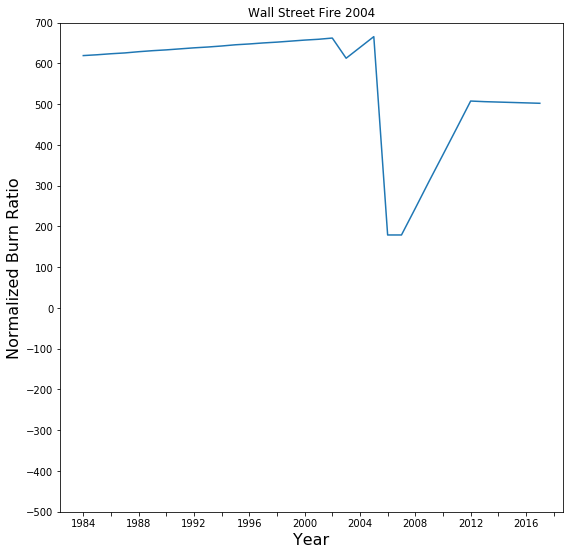

In [42]:
graph_fire("WALL")

#Graphed Output of Ancillary Data Set on Wildfires and Acres Burned in US 1984-2018

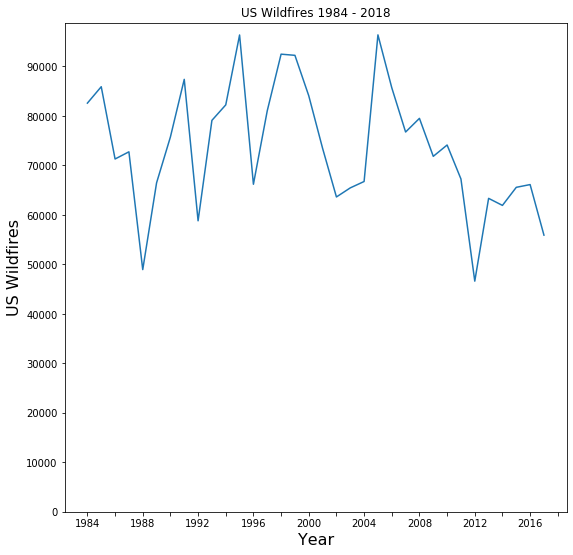

In [43]:
graph_us()

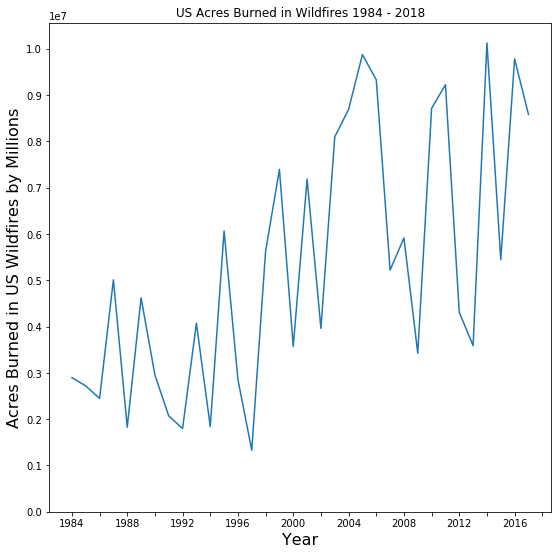

In [44]:
graph_acres()

#Graphed Output of All Fires in Data Set US Forest Service Data - RDS-2019-0005

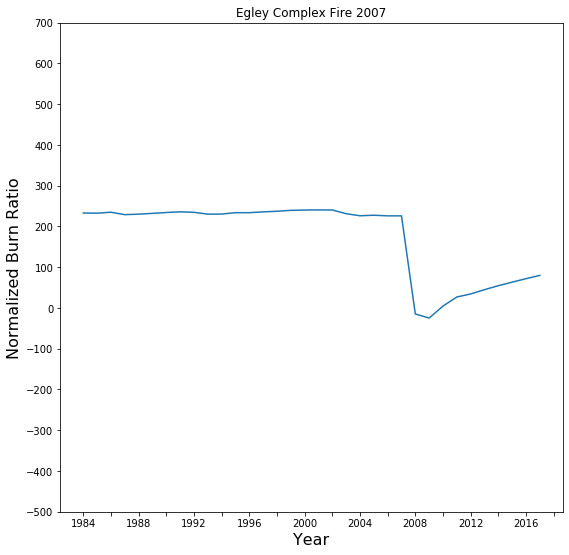

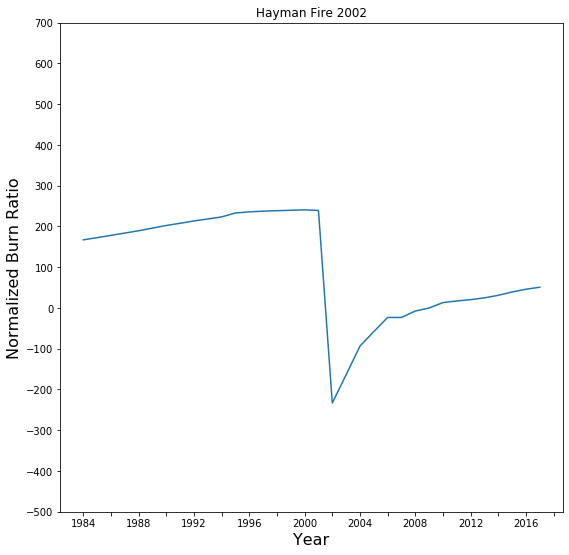

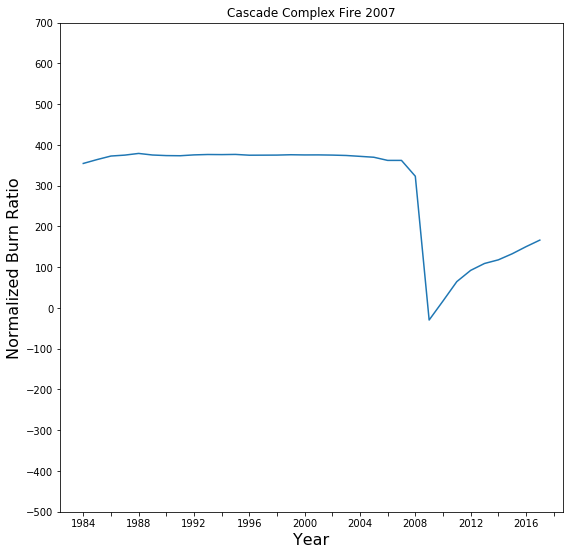

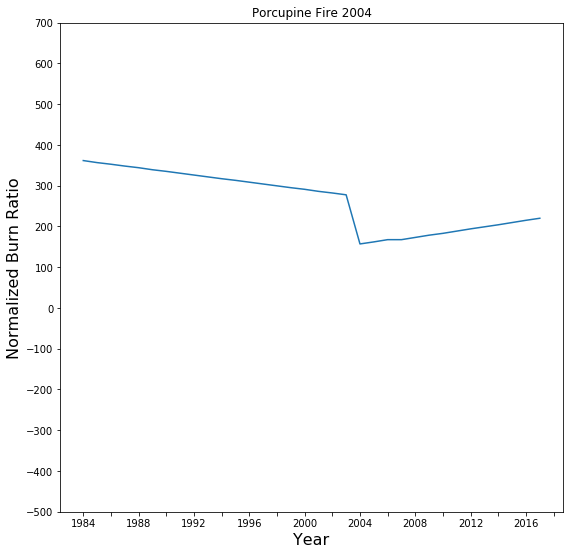

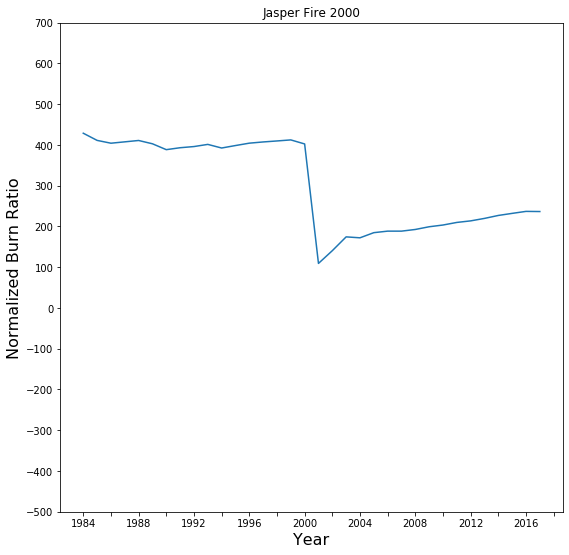

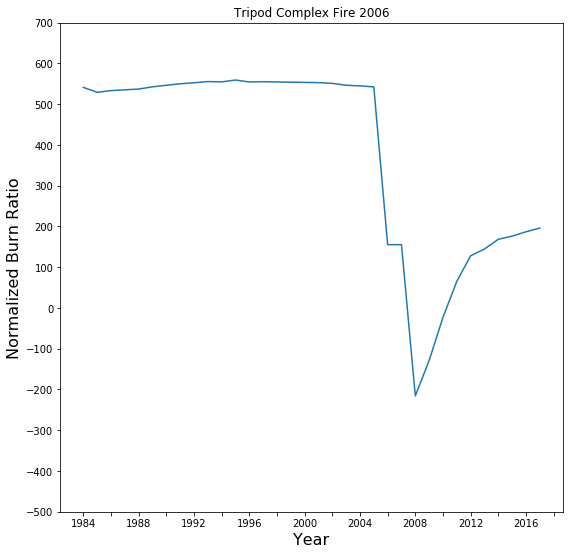

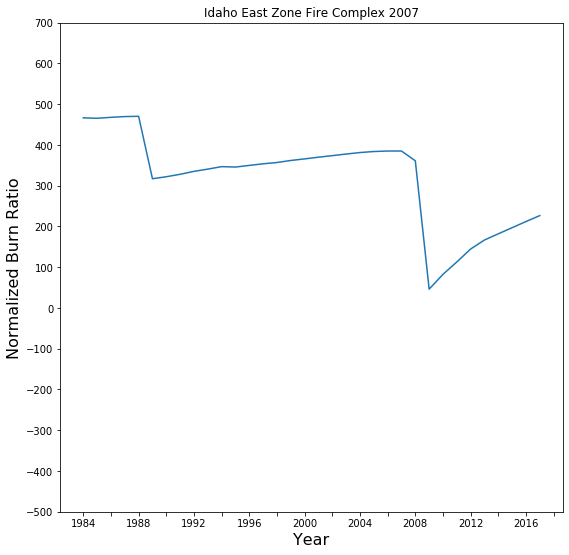

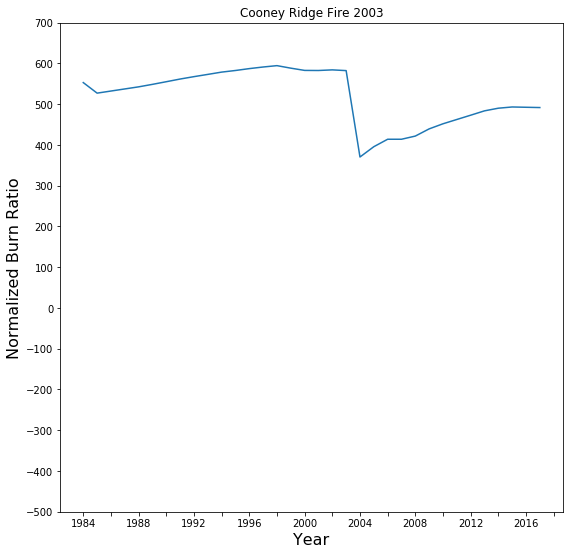

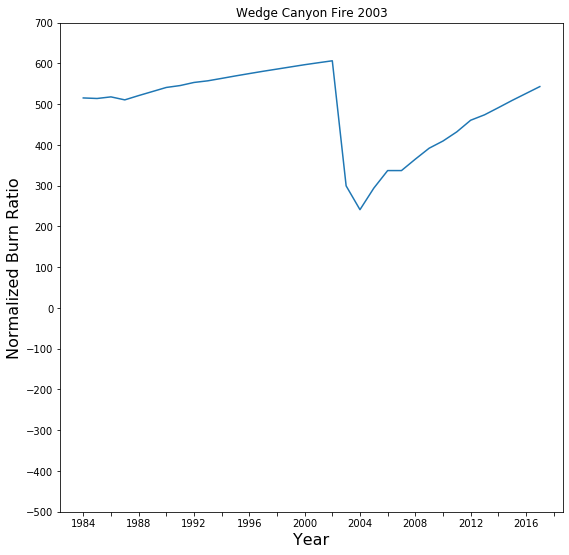

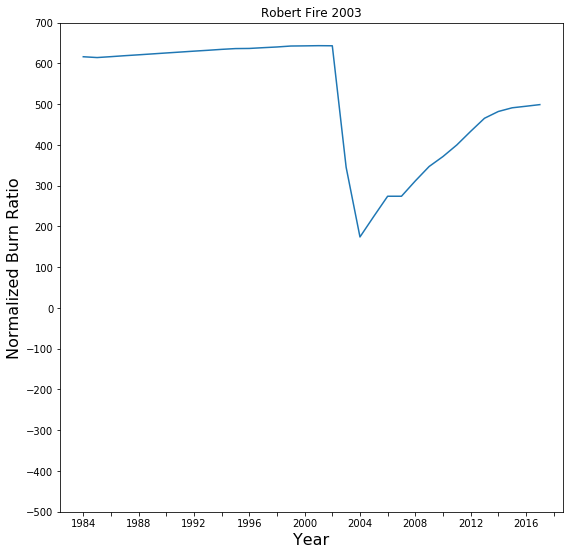

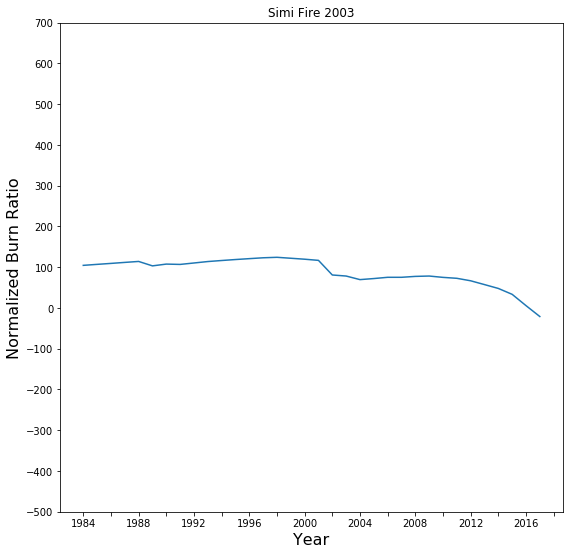

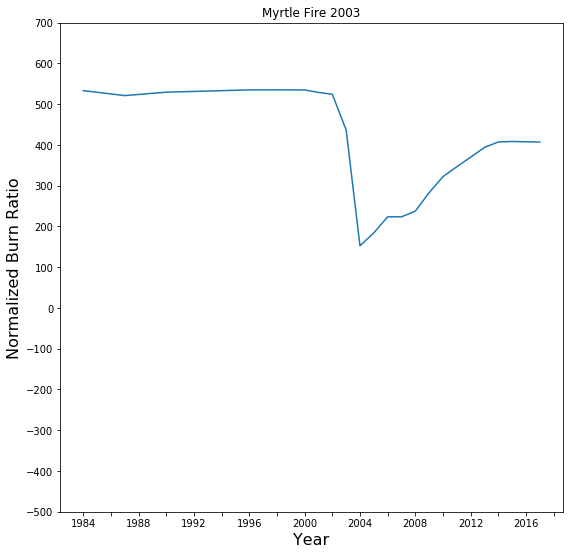

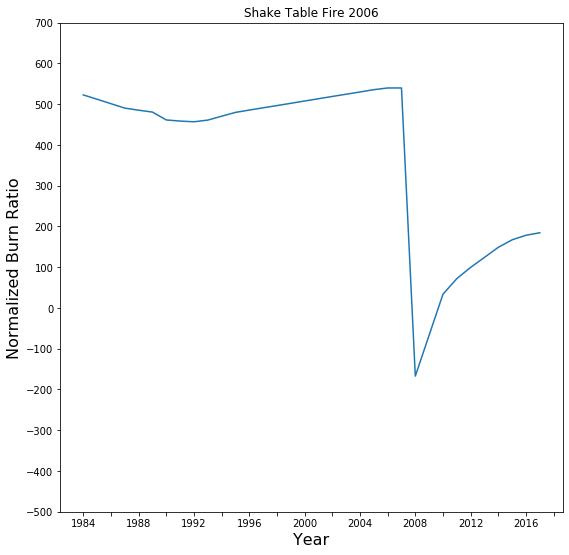

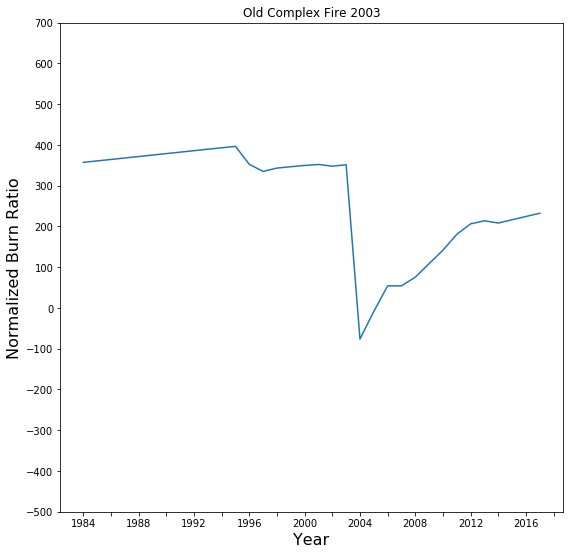

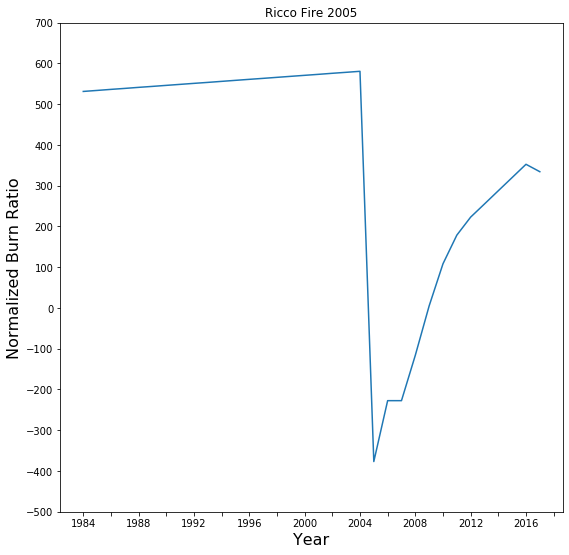

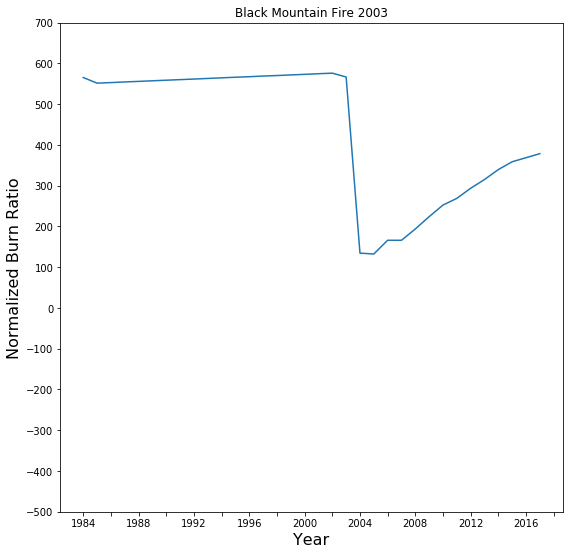

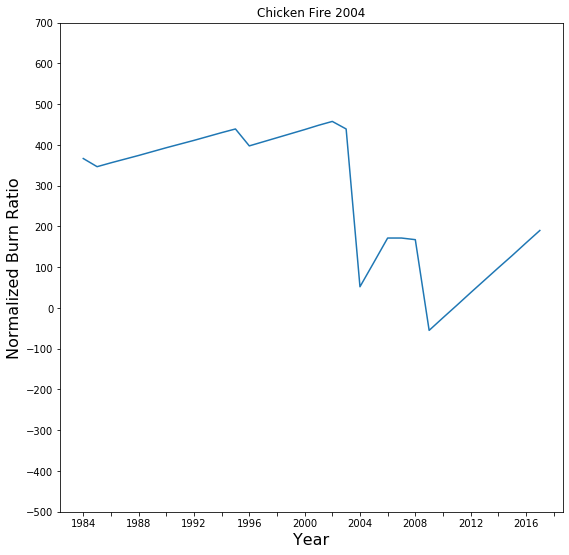

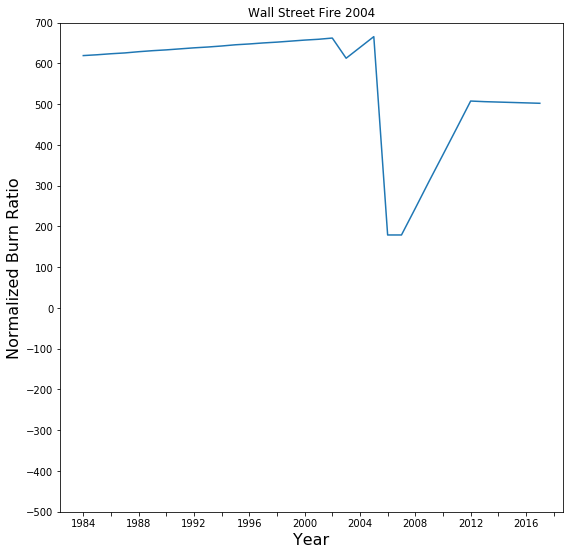

In [45]:
for value in fires:
  graph_fire(value)

#Conclusions

1. When looking at the fire incidents across the entire United States it seems clear that while the number of random wildfires, a result of lightning strikes (for instance Alaska can get approximately 8k+ lightning strikes in a 24 hour period) or arson has remained roughly consistent over the last few decades. However during that same period there seems to be a marked increase in the number of acres burned per year. This deserves further study.
2. The NBR data across a number of wildfires studied shows interesting results. The Simi fire for example took place in an area well within the wildland / urban interface. The area contains hundreds of acres of concrete, thousands of structures, and is heavily built out compared to other areas in the data set. As a result it's to be expected that the NBR numbers prior to the burn would be relatively low denoting relatively low amount of biomass. After the fires in the study the biomass never recovers as shown in the data. This is also not surprising as in an urban area where people live fires usually involve rebuilding which rarely see an increase in biomass.
3. The Ricco fire in South Dakota on the other hand happened just outside of Rapid City in a rugged high altitude area with little if any human involvmenet outside of activities focused purely on nature. World class fishing and hiking can be found in these areas and the inhabits of the surrounding areas gain both access to these resources plus income derived from these resources staying intact. As a result the NBR data shows a very high level of biomass in the fire area followed by a relatively quick rebuilding of the biomass, due in no small part to the surrounding community supporting the regrowth of biomass. The difference is quite stark when compared to the data from the Simi Valley fire in California.

In short I hope to do more research in this area. I am fascinated by the results this simple analysis has shown and eager to learn more.